In [1]:
#-*- coding: utf-8 -*-
import sys
import json
import requests
import geoplotlib
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from geopy.distance import geodesic
from IPython.display import Image as Show

# import our custom functions: 
from api_functions import *
from eco_functions import *
from display_functions import *

In [2]:
# coords are in format [lat,lon]
b = 150 
country = "ES"
h_salida = "15h 23m"
start  = [40.22, -3.6845]
destin = [41.57, -0.7528]

transport = "car"
mode      = "fastest" # ["fastest", "shortest", "balanced"]
traffic   = "enabled"

response = hereApiRouteCall(start, destin, 
                            transport, mode, traffic)

In [3]:
# get custom route info
route_info = getRouteInfo(response)
route_info

{'distance': 368.544,
 'time_wo_traffic': '3h 31m',
 'time_w_traffic': '3h 59m',
 'instructions': ['Take ramp onto A-4 (Autovía del Sur). Go for 5.6 km.',
  'Take exit 17 toward A-3/R-3/A-2 onto M-50. Go for 23.4 km.',
  'Keep right onto M-45. Go for 5.7 km.',
  'Continue on M-50. Go for 4.2 km.',
  'Keep left onto M-50. Go for 2.1 km.',
  'Keep right toward R-2/Guadalajara/Zaragoza. Go for 1.1 km.',
  'Keep right onto R-2 (Autopista Radial 2). Go for 42.8 km.',
  'Take the exit onto A-2 (Autovía del Nordeste). Go for 267 km.',
  'Continue on AP-2 (Autopista Zaragoza Mediterráneo). Go for 4.4 km.',
  'Take exit 1B toward Belchite/A-222/Alcañiz/Castellón/N-232 onto ARA-A1. Go for 4.8 km.',
  'Take the 1st exit from roundabout toward N-232/Zaragoza. Go for 268 m.',
  'Take the 2nd exit from roundabout onto N-232 toward Zaragoza. Go for 5.6 km.',
  'Take ramp toward El Burgo de Ebro. Go for 385 m.',
  'Take the 1st exit from roundabout onto N-232a. Go for 387 m.',
  'Continue on Calle Ram

In [4]:
# find points separated by more than k kilometers
points = getDirChanges(response)
limits = chargingSegments(points, b=b)
limits

[{'p': [40.2196367, -3.6849632], 'n': 1},
 {'p': [40.6640589, -3.1103754], 'n': 1},
 {'p': [41.6091084, -0.6957114], 'n': 4}]

In [5]:
centers = chargingCentroids(limits)
centers

[{'c': [40.2196367, -3.6849632], 'r': 92.75920969614124},
 {'c': [40.6640589, -3.1103754], 'r': 82.91394972549848},
 {'c': [40.900321274999996, -2.5067094], 'r': 82.91394972549848},
 {'c': [41.13658365, -1.9030434], 'r': 82.91394972549848},
 {'c': [41.372846025, -1.2993774], 'r': 82.91394972549848}]

In [6]:
# create list of chargers
chargers_global = getAllChargers(centers, country=country)
chargers_global[0][:5]

c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\eric\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[{'coords': [40.1842308, -3.67937029999996], 'power': 2.13},
 {'coords': [40.29037, -3.69629], 'power': 120.0},
 {'coords': [40.3058559, -3.732334700000024], 'power': 2.4},
 {'coords': [40.284169, -3.785185], 'power': 17.0},
 {'coords': [40.3008455, -3.77622640000004], 'power': 3.7}]

In [7]:
# select k better chargers around X area
chargers = kChargers(chargers_global, k=15)
chargers

[[{'coords': [40.447802, -3.63562], 'power': 11.0},
  {'coords': [40.441629, -3.783134], 'power': 11.0},
  {'coords': [40.457343, -3.688678], 'power': 11.0},
  {'coords': [40.401317, -3.879808], 'power': 12.15},
  {'coords': [40.4075168539176, -3.87742042946514], 'power': 12.2},
  {'coords': [40.450133, -3.651345], 'power': 17.0},
  {'coords': [40.4205934, -3.55533939999998], 'power': 20.0},
  {'coords': [40.432498, -3.68678], 'power': 22.0},
  {'coords': [40.436415, -3.690211], 'power': 22.0},
  {'coords': [40.441895, -3.674985], 'power': 22.0},
  {'coords': [40.43054, -3.812142], 'power': 22.0},
  {'coords': [40.455272, -3.694315], 'power': 22.0},
  {'coords': [40.4346073, -3.815691499999957], 'power': 22.0},
  {'coords': [40.4245212887834, -3.67195950799407],
   'power': 47.666666666666664},
  {'coords': [40.446606, -3.697228], 'power': 50.0}],
 [{'coords': [40.481554, -3.361708], 'power': 11.0},
  {'coords': [40.475131, -3.392466], 'power': 11.0},
  {'coords': [40.539573, -3.611691

In [8]:
first_chargers = firstChargers(start, chargers, b=b)
first_chargers

[{'dist': 149.795,
  'eta': '1h 45m',
  'coords': [41.105906, -2.604201],
  'power': 11.0},
 {'dist': 80.737,
  'eta': '1h 12m',
  'coords': [40.855923, -3.612783],
  'power': 22.0},
 {'dist': 50.117,
  'eta': '0h 57m',
  'coords': [40.607861, -3.590686],
  'power': 22.0},
 {'dist': 49.444,
  'eta': '0h 51m',
  'coords': [40.5127038, -3.346726600000011],
  'power': 12.2},
 {'dist': 46.499,
  'eta': '0h 43m',
  'coords': [40.4898952632732, -3.35429092209017],
  'power': 50.0},
 {'dist': 46.139,
  'eta': '0h 43m',
  'coords': [40.481554, -3.361708],
  'power': 11.0},
 {'dist': 42.954,
  'eta': '0h 35m',
  'coords': [40.475131, -3.392466],
  'power': 11.0},
 {'dist': 41.078,
  'eta': '0h 33m',
  'coords': [40.539573, -3.611691],
  'power': 11.0},
 {'dist': 40.025,
  'eta': '0h 36m',
  'coords': [40.534692, -3.621364],
  'power': 22.0},
 {'dist': 38.687,
  'eta': '0h 53m',
  'coords': [40.529708, -3.693392],
  'power': 22.0},
 {'dist': 37.3,
  'eta': '0h 36m',
  'coords': [40.519275, -3.65

In [9]:
# predecimos el eco_score de cada uno
ai_predictor = AI_Predictor()
month        = 7
day          = 15
start_time   = enumerateTime(h_salida)

Calculating Absolute eco-score


In [10]:
for i, charger in enumerate(first_chargers):
    travel_time = enumerateTime(charger["eta"])
    abs_, rel_, delta, delta_rel_ = ai_predictor.calculate(month,
                                                           day,
                                                           start_time,
                                                           travel_time)
    first_chargers[i]["abs_"]       = abs_
    first_chargers[i]["rel_"]       = rel_
    first_chargers[i]["delta"]      = delta
    first_chargers[i]["delta_rel_"] = delta_rel_


 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 70 minutos

 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 100 minutos

 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 110 minutos

 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 120 minutos

 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 130 minutos

 ////// ALERTA /////// 

Si te esperas un poco conseguirás un mejor eco-score!
El eco-score planeado puede llegar a ser de:  6.914218452497559 dentro de 130 minutos

 ///

In [11]:
first_chargers

[{'dist': 149.795,
  'eta': '1h 45m',
  'coords': [41.105906, -2.604201],
  'power': 11.0,
  'abs_': 6.411397792054388,
  'rel_': 6.840214869523352,
  'delta': 70,
  'delta_rel_': 6.914218452497559},
 {'dist': 80.737,
  'eta': '1h 12m',
  'coords': [40.855923, -3.612783],
  'power': 22.0,
  'abs_': 6.391187147350131,
  'rel_': 6.750606413822431,
  'delta': 100,
  'delta_rel_': 6.914218452497559},
 {'dist': 50.117,
  'eta': '0h 57m',
  'coords': [40.607861, -3.590686],
  'power': 22.0,
  'abs_': 6.383535430783251,
  'rel_': 6.716680801104356,
  'delta': 110,
  'delta_rel_': 6.914218452497559},
 {'dist': 49.444,
  'eta': '0h 51m',
  'coords': [40.5127038, -3.346726600000011],
  'power': 12.2,
  'abs_': 6.375378852025721,
  'rel_': 6.680516767895101,
  'delta': 120,
  'delta_rel_': 6.914218452497559},
 {'dist': 46.499,
  'eta': '0h 43m',
  'coords': [40.4898952632732, -3.35429092209017],
  'power': 50.0,
  'abs_': 6.373331849509326,
  'rel_': 6.67144092014288,
  'delta': 130,
  'delta_rel

In [36]:
def displayChargers(chargers, color="red", img_name="charging_points"):
	""" Puts the charging points in a map. Saves image to disk. """
	lats, lons, powers = [], [], []
	for center in chargers:
	    for charger in center:
	        lats.append(charger["coords"][0])
	        lons.append(charger["coords"][1])
	        powers.append(charger["power"])
	        
	thedata = pd.DataFrame({"lat": lats, "lon": lons, "powers": powers})
	geoplotlib.dot(thedata, color=color)
	geoplotlib.savefig(img_name)
	return True

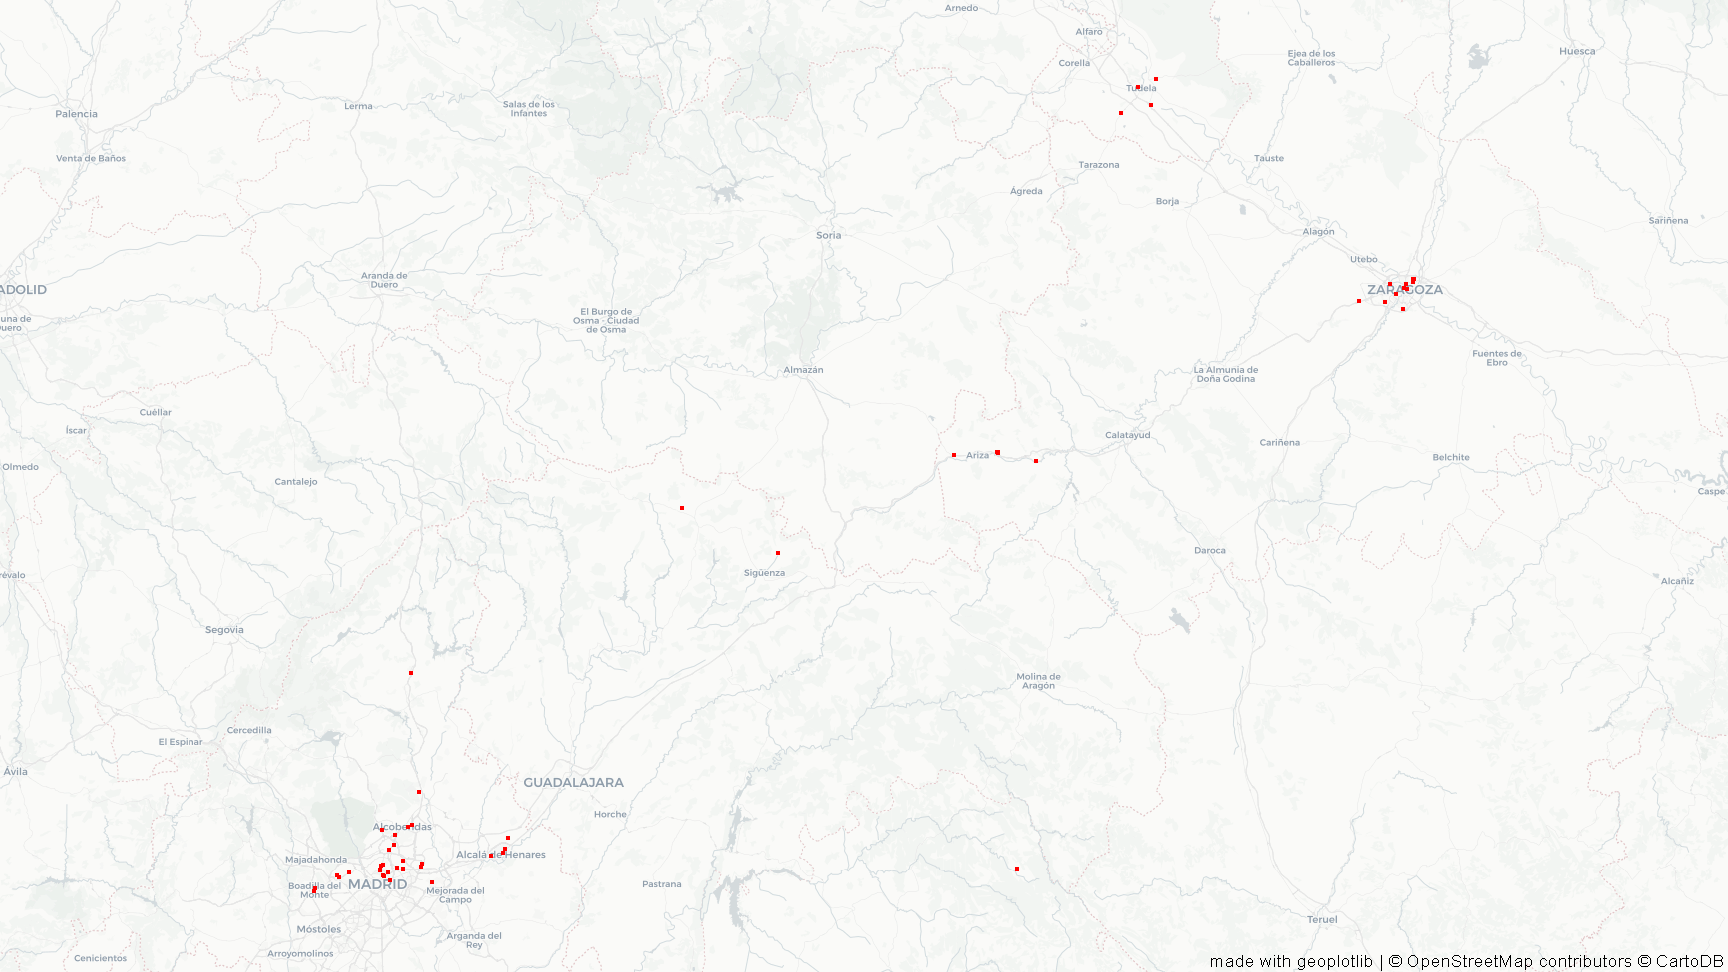

In [37]:
# generate image w/ charging points
img_name = "charging_points"
displayChargers(chargers, img_name=img_name)

Show(filename=img_name+".png")

In [ ]:
def checkName(node, name):
    if node[name] == name:
        return True
    else:
        return checkName(node["children"], name)
    
for node in nodes:
    checkcheckName(NODE, "Julio")

In [ ]:
for node in nodes:
    checkcheckName(NODE, "Julio")
            